In [1]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: dataset/Testing/bears/k4 (73).jpeg  
  inflating: dataset/Testing/bears/k4 (73).jpg  
  inflating

In [2]:
!pip install tensorflow

In [4]:
!pip install -q kaggle
!mkdir ~/.kaggle

In [6]:
!cp kaggle.json ~/.kaggle

In [7]:
!kaggle datasets download -d saumyamohandas/animal-dataset

 67% 42.0M/62.3M [00:00<00:00, 68.9MB/s]
100% 62.3M/62.3M [00:00<00:00, 81.8MB/s]


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
#2.configure image data generator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [17]:
#3.Apply image data generator functionality to train and test images
x_train=train_datagen.flow_from_directory(r'/content/dataset/Training',target_size=(64,64),batch_size=32,class_mode="categorical")
x_test = test_datagen.flow_from_directory(r'/content/dataset/Testing',target_size = (64,64),batch_size = 32 , class_mode = 'categorical')

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [18]:
print(x_train.class_indices)

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}


In [19]:
#2.initializing the model
model=Sequential()

In [20]:
#3.add convolution layer(no.of filters,size of filter,input shape)
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [21]:
#add max pool layer(pool_size)
model.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
#add flatten layer  ---input of ann
model.add(Flatten())

In [23]:
#ann hidden layer
model.add(Dense(units=128,activation="relu"))

In [24]:
#add output layer
model.add(Dense(units=4,activation="softmax"))

In [25]:
#Compile the model (loss fucntion,accuracy,optimizer)
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics="accuracy")

steps per epoch=no.of samples in your trainingset/batch size

1238/32=38.6=39

In [26]:
#fit model (x_train,steps_per epoch,epochs,validation_data,validation_steps)
model.fit(x_train,steps_per_epoch=39,epochs=5,validation_data=x_test,validation_steps=10)

Epoch 1/5
39/39 [==============================] - 11s 260ms/step - loss: 1.5198 - accuracy: 0.3958 - val_loss: 1.1516 - val_accuracy: 0.4563
Epoch 2/5
39/39 [==============================] - 10s 257ms/step - loss: 0.9497 - accuracy: 0.6066 - val_loss: 0.6819 - val_accuracy: 0.7688
Epoch 3/5
39/39 [==============================] - 9s 220ms/step - loss: 0.8171 - accuracy: 0.6858 - val_loss: 0.7182 - val_accuracy: 0.7469
Epoch 4/5
39/39 [==============================] - 9s 221ms/step - loss: 0.7499 - accuracy: 0.7197 - val_loss: 0.5249 - val_accuracy: 0.8031
Epoch 5/5
39/39 [==============================] - 10s 249ms/step - loss: 0.6835 - accuracy: 0.7237 - val_loss: 0.4473 - val_accuracy: 0.8687


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 3937796 (15.02 MB)
Trainable params: 3937796 (15.02 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [37]:
![image.png](attachment:image.png)

/bin/bash: -c: line 1: syntax error near unexpected token `attachment:image.png'
/bin/bash: -c: line 1: `[image.png](attachment:image.png)'


In [30]:
#Convolution layers
No. of filters * (input channels* window_size+1)==number_parameters
32 * (3*(3*3)+1)

896

In [31]:
#dense
output_size *(input_size+1) == number_parameters
128*(30752+1)

3936384

In [32]:
# dense_1 (Dense)
4*(128+1)

516

In [33]:
#save our model
model.save("animal.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Test The Model

In [34]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [35]:
import tensorflow as tf

In [38]:
model=tf.keras.models.load_model(r"/content/animal.h5",compile=False)

In [40]:
#D:\SmartBridge\VIT_morning_slot\dataset\Testing\elephants\nature_3306013__340.jpg
img=image.load_img(r"/content/dataset/Testing/elephants/Z (12).jpeg",target_size=(64,64))

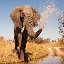

In [41]:
img

In [42]:
x=image.img_to_array(img)

In [43]:
x

array([[[115., 149., 187.],
        [115., 149., 187.],
        [115., 149., 187.],
        ...,
        [113., 145., 183.],
        [112., 144., 182.],
        [123., 155., 196.]],

       [[117., 151., 189.],
        [117., 151., 189.],
        [117., 151., 189.],
        ...,
        [115., 147., 185.],
        [113., 145., 183.],
        [112., 147., 187.]],

       [[119., 153., 191.],
        [119., 153., 191.],
        [119., 153., 191.],
        ...,
        [116., 148., 186.],
        [114., 146., 184.],
        [114., 152., 189.]],

       ...,

       [[214., 149.,  67.],
        [211., 146.,  66.],
        [142.,  76.,   0.],
        ...,
        [135., 109.,  94.],
        [146., 111.,  91.],
        [137.,  92.,  53.]],

       [[190., 126.,  52.],
        [218., 154.,  80.],
        [209., 146.,  77.],
        ...,
        [136., 102.,  92.],
        [118.,  85.,  78.],
        [151., 116.,  94.]],

       [[139.,  85.,  23.],
        [114.,  59.,   3.],
        [144.,  

In [44]:
x=np.expand_dims(x,axis=0)

In [45]:
x.ndim

4

In [46]:
x.shape

(1, 64, 64, 3)

In [47]:
pred=model.predict(x)

1/1 [==============================] - 0s 97ms/step


In [48]:
pred

array([[0., 0., 1., 0.]], dtype=float32)

In [49]:
{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

In [50]:
pred_class=np.argmax(pred,axis=1)

In [51]:
pred_class[0]

2

In [52]:
index=['bears', 'crows', 'elephants', 'rats']
result=str(index[pred_class[0]])

In [53]:
result

'elephants'